In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline


In [3]:
from google.colab import files
uploaded = files.upload()


Saving odoo_erp_projects.csv to odoo_erp_projects.csv


In [5]:
import pandas as pd

# Replace with your actual filename
filename = list(uploaded.keys())[0]

# Load CSV into DataFrame
data = pd.read_csv(filename)

# Preview the data to confirm
data.head()

,Industry,Num_Modules,Customization_Level,Team_Size,Team_Experience_Years,Client_Size,Contract_Complexity,Duration_Weeks
0,Retail,15,0.41,8,0.7,352,9.4,8.3
1,Education,17,0.62,8,3.1,97,15.1,14.2
2,eCommerce,5,0.10,3,1.1,827,1.8,2.0
3,Wholesale,10,0.60,5,4.7,785,10.6,12.5
4,Manufacturing,18,0.19,7,5.1,946,11.6,4.9


       Num_Modules  Customization_Level   Team_Size  Team_Experience_Years  \
count   300.000000           300.000000  300.000000             300.000000   
mean     11.500000             0.286300    7.143333               3.497000   
std       5.422917             0.166014    2.535920               1.524677   
min       3.000000             0.050000    3.000000               0.500000   
25%       7.000000             0.147500    5.000000               2.400000   
50%      12.000000             0.260000    7.000000               3.500000   
75%      16.000000             0.400000    9.000000               4.600000   
max      20.000000             0.780000   11.000000               7.600000   

       Client_Size  Contract_Complexity  Duration_Weeks  
count   300.000000           300.000000      300.000000  
mean    517.333333             7.736333        5.259667  
std     286.110748             3.079153        3.926406  
min      12.000000             1.000000        2.000000  
25%    

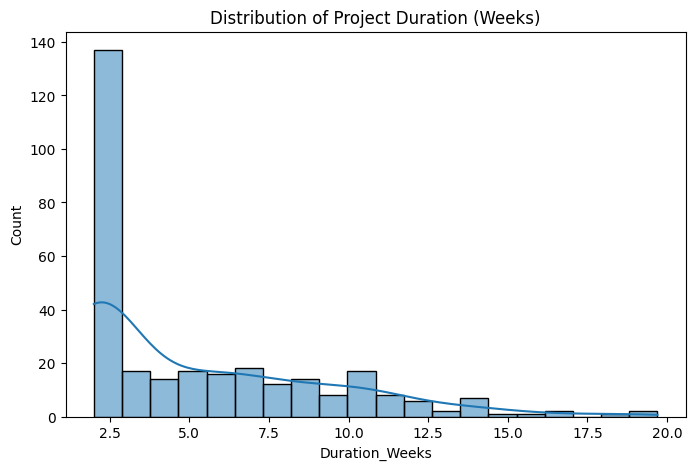

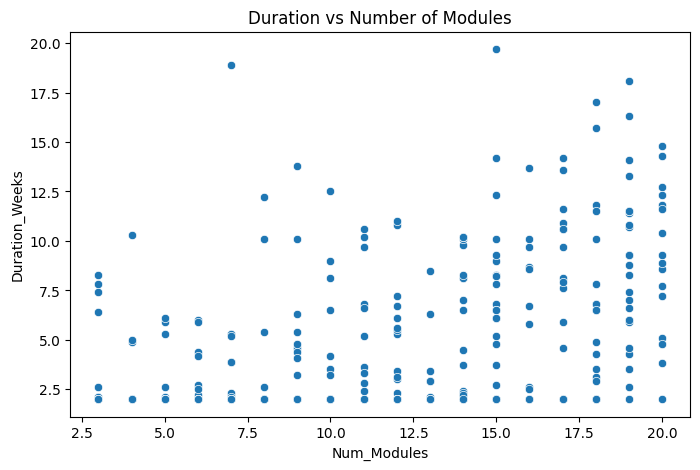

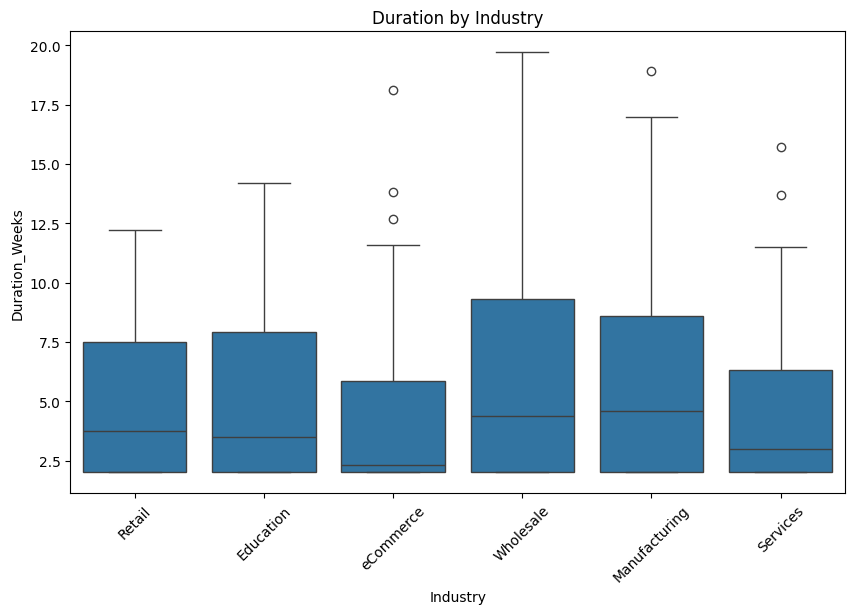

In [6]:
# Summary statistics
print(data.describe())

# Distribution of Duration
plt.figure(figsize=(8, 5))
sns.histplot(data['Duration_Weeks'], bins=20, kde=True)
plt.title('Distribution of Project Duration (Weeks)')
plt.show()

# Check relationship of Duration with Num_Modules
plt.figure(figsize=(8,5))
sns.scatterplot(x='Num_Modules', y='Duration_Weeks', data=data)
plt.title('Duration vs Number of Modules')
plt.show()

# Boxplot of Duration by Industry
plt.figure(figsize=(10, 6))
sns.boxplot(x='Industry', y='Duration_Weeks', data=data)
plt.title('Duration by Industry')
plt.xticks(rotation=45)
plt.show()


In [11]:
X = data.drop(columns=['Duration_Weeks'])  # drop only target column, assuming no Project_ID column
y = data['Duration_Weeks']

categorical_features = ['Industry']
numerical_features = ['Num_Modules', 'Customization_Level', 'Team_Size', 'Team_Experience_Years']  # corrected name

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(drop='first'), categorical_features),
        ('num', 'passthrough', numerical_features)
    ])


In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [13]:
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

model.fit(X_train, y_train)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat',
                                                  OneHotEncoder(drop='first'),
                                                  ['Industry']),
                                                 ('num', 'passthrough',
                                                  ['Num_Modules',
                                                   'Customization_Level',
                                                   'Team_Size',
                                                   'Team_Experience_Years'])])),
                ('regressor', LinearRegression())])

Mean Absolute Error (MAE): 2.05 weeks
Mean Squared Error (MSE): 5.96
R^2 Score: 0.56


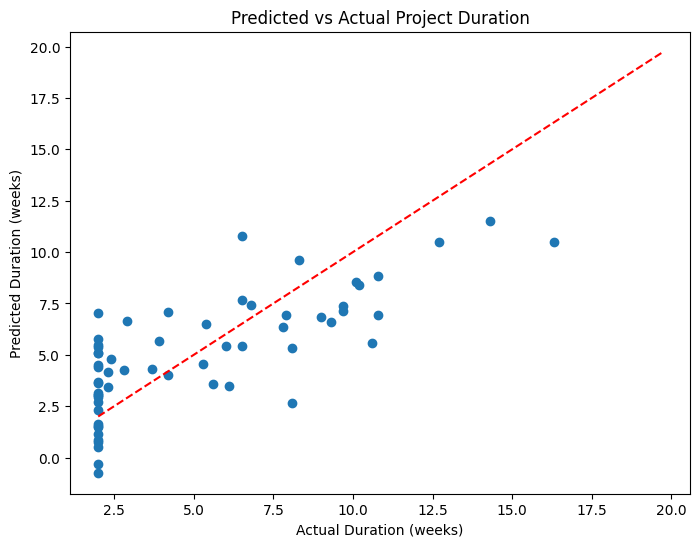

In [14]:
y_pred = model.predict(X_test)

print(f"Mean Absolute Error (MAE): {mean_absolute_error(y_test, y_pred):.2f} weeks")
print(f"Mean Squared Error (MSE): {mean_squared_error(y_test, y_pred):.2f}")
print(f"R^2 Score: {r2_score(y_test, y_pred):.2f}")

# Plot predicted vs actual
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
plt.xlabel('Actual Duration (weeks)')
plt.ylabel('Predicted Duration (weeks)')
plt.title('Predicted vs Actual Project Duration')
plt.show()


In [15]:
# Extract feature names after one-hot encoding
ohe = model.named_steps['preprocessor'].named_transformers_['cat']
encoded_cat_features = ohe.get_feature_names_out(categorical_features)
feature_names = np.concatenate([encoded_cat_features, numerical_features])

coefficients = model.named_steps['regressor'].coef_

coef_df = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': coefficients
}).sort_values(by='Coefficient', ascending=False)

print(coef_df)


                  Feature  Coefficient
6     Customization_Level    10.688708
0  Industry_Manufacturing     0.908903
1         Industry_Retail     0.668766
3      Industry_Wholesale     0.472359
5             Num_Modules     0.345842
2       Industry_Services    -0.187420
4      Industry_eCommerce    -0.232788
7               Team_Size    -0.361659
8   Team_Experience_Years    -0.510057


In [17]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Feature selection for the current dataset
X = data.drop(columns=['Duration_Weeks']) # Assuming 'Duration_Weeks' is the target variable
y = data['Duration_Weeks']

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model training
# We will use the preprocessor defined earlier
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

# Define categorical and numerical columns - assuming these are the correct ones based on previous cells
categorical_features = ['Industry']
numerical_features = ['Num_Modules', 'Customization_Level', 'Team_Size', 'Team_Experience_Years', 'Client_Size', 'Contract_Complexity']


preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore', drop='first'), categorical_features),
        ('num', 'passthrough', numerical_features)
    ])

model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(n_estimators=100, random_state=42))
])


model.fit(X_train, y_train)

# Prediction
y_pred = model.predict(X_test)

# Evaluate accuracy
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f'MAE: {mae:.2f}')
print(f'RMSE: {rmse:.2f}')
print(f'R² Score: {r2:.2f}')

MAE: 1.93
RMSE: 2.53
R² Score: 0.53


In [23]:
print(df.columns)



Index(['Industry', 'Num_Modules', 'Customization_Level', 'Team_Size',
       'Team_Experience_Years', 'Client_Size', 'Contract_Complexity',
       'Duration_Weeks'],
      dtype='object')


In [25]:
X = data.drop(columns=['Duration_Weeks'])
y = data['Duration_Weeks']

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Convert categorical variables if needed (e.g., Industry)
X = pd.get_dummies(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print('MAE:', mean_absolute_error(y_test, y_pred))
print('RMSE:', np.sqrt(mean_squared_error(y_test, y_pred)))
print('R2 Score:', r2_score(y_test, y_pred))

MAE: 1.9377833333333334
RMSE: 2.527176721824838
R2 Score: 0.53378340162451


In [27]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
import numpy as np

param_dist = {
    'n_estimators': [100, 200, 500],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt']
}

rf = RandomForestRegressor(random_state=42)
random_search = RandomizedSearchCV(rf, param_distributions=param_dist, n_iter=20, cv=5, scoring='r2', random_state=42)
random_search.fit(X_train, y_train)

print("Best parameters:", random_search.best_params_)
print("Best cross-val R2:", random_search.best_score_)

# Use best estimator to predict
best_model = random_search.best_estimator_
y_pred = best_model.predict(X_test)
print("Test MAE:", mean_absolute_error(y_test, y_pred))
print("Test R2:", r2_score(y_test, y_pred))


/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
55 fits failed out of a total of 100.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
55 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.12/dist-packages/sklearn/base.py", line 1382, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.12/dist-packages/sklearn/base.py", line 436, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.12/dist-packages/sklearn/utils/

Best parameters: {'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 30}
Best cross-val R2: 0.4715863666918489
Test MAE: 1.901795833333334
Test R2: 0.5901962096977458


In [28]:
pip install xgboost


In [29]:
import xgboost as xgb
from sklearn.model_selection import RandomizedSearchCV

# Create the regressor
xgb_model = xgb.XGBRegressor(objective='reg:squarederror', random_state=42)

# Define hyperparameter grid
param_dist = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7, 10],
    'learning_rate': [0.01, 0.05, 0.1],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'reg_alpha': [0, 0.01, 0.1],  # L1 regularization
    'reg_lambda': [1, 1.5, 2]     # L2 regularization
}

# Setup RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=xgb_model,
    param_distributions=param_dist,
    n_iter=50,  # number of parameter settings sampled
    scoring='r2',
    cv=5,
    verbose=2,
    random_state=42,
    n_jobs=-1
)

# Fit on your training data (X_train, y_train)
random_search.fit(X_train, y_train)

print("Best parameters:", random_search.best_params_)
print("Best CV R2:", random_search.best_score_)


Fitting 5 folds for each of 50 candidates, totalling 250 fits
Best parameters: {'subsample': 0.6, 'reg_lambda': 1.5, 'reg_alpha': 0.1, 'n_estimators': 100, 'max_depth': 3, 'learning_rate': 0.05, 'colsample_bytree': 0.8}
Best CV R2: 0.4735555991735917


In [30]:
pip install lightgbm


In [31]:
import lightgbm as lgb
from sklearn.model_selection import RandomizedSearchCV

# Create the regressor
lgb_model = lgb.LGBMRegressor(random_state=42)

# Define hyperparameter grid
param_dist = {
    'num_leaves': [31, 50, 70],
    'max_depth': [-1, 10, 20, 30],
    'learning_rate': [0.01, 0.05, 0.1],
    'n_estimators': [100, 200, 300],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'reg_alpha': [0, 0.01, 0.1],
    'reg_lambda': [0, 1, 1.5]
}

# Setup RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=lgb_model,
    param_distributions=param_dist,
    n_iter=50,
    scoring='r2',
    cv=5,
    verbose=2,
    random_state=42,
    n_jobs=-1
)

# Fit on your training data (X_train, y_train)
random_search.fit(X_train, y_train)

print("Best parameters:", random_search.best_params_)
print("Best CV R2:", random_search.best_score_)


Fitting 5 folds for each of 50 candidates, totalling 250 fits
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000046 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 276
[LightGBM] [Info] Number of data points in the train set: 240, number of used features: 12
[LightGBM] [Info] Start training from score 5.295000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

In [2]:
from sklearn.metrics import mean_absolute_error, r2_score
